In [58]:
# Keras
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Model

#SciKit
from sklearn.metrics import confusion_matrix

#matplot
import matplotlib.pyplot as plt

#Numpy
import numpy as np

# Loading [Mnist](https://keras.io/api/datasets/mnist/) dataset

In [59]:

np.random.seed(123)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train/255
x_test =x_test/255

y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

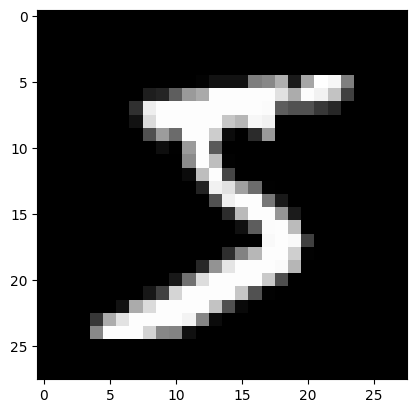

In [60]:
img = x_train[0]
plt.imshow(img, cmap='gray')
plt.show()

# LeNet

In [61]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [62]:
model.build()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_20 (Aver  (None, 12, 12, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_21 (Aver  (None, 4, 4, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 120)             

## Training Phase

In [63]:
precision = keras.metrics.Precision()
recall = keras.metrics.Recall()
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy', precision, recall])

model.fit(x_train, y_train_onehot,
          batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3834 - accuracy: 0.8844 - precision_6: 0.9358 - recall_6: 0.8396
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1220 - accuracy: 0.9635 - precision_6: 0.9694 - recall_6: 0.9581
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0816 - accuracy: 0.9749 - precision_6: 0.9789 - recall_6: 0.9720
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0655 - accuracy: 0.9796 - precision_6: 0.9820 - recall_6: 0.9775
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0546 - accuracy: 0.9834 - precision_6: 0.9854 - recall_6: 0.9818


## Test Phase

Evaluate

In [64]:
score = model.evaluate(x_test, y_test_onehot, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9847 - precision_6: 0.9868 - recall_6: 0.9825


Confusion Matrix

In [65]:
ŷ = model.predict(x_test)
y_pred = [np.argmax(yi) for yi in ŷ]
confusion_matrix(y_test, y_pred)

313/313 [==============================] - 1s 3ms/step


array([[ 973,    1,    0,    0,    0,    0,    3,    1,    2,    0],
       [   0, 1131,    1,    0,    0,    0,    1,    1,    1,    0],
       [   1,    4, 1018,    2,    0,    0,    1,    4,    2,    0],
       [   1,    0,    2,  996,    0,    5,    0,    5,    0,    1],
       [   0,    0,    1,    0,  973,    0,    2,    2,    0,    4],
       [   2,    0,    0,    6,    0,  877,    3,    2,    0,    2],
       [   4,    2,    0,    1,    1,    4,  946,    0,    0,    0],
       [   0,    5,    6,    0,    0,    0,    0, 1015,    0,    2],
       [   2,    1,    2,    2,    5,    3,    4,    5,  946,    4],
       [   0,    6,    1,    4,   12,    3,    1,    9,    1,  972]])

## Visualizing Feature maps

1/1 [==============================] - 0s 39ms/step


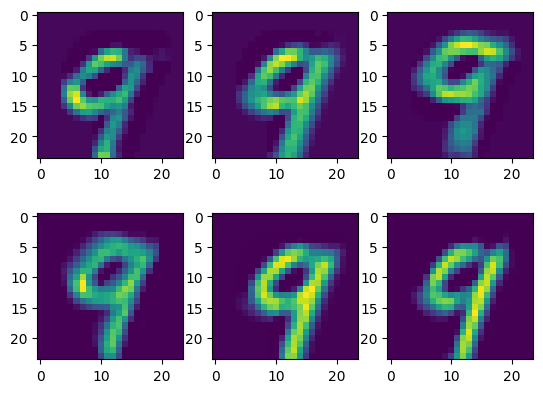

In [85]:
# Create a model that will return these outputs, given the model input
feature_map_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

# Use the model to predict the features
feature_maps = feature_map_model.predict(x_test[12].reshape(1, 28, 28, 1))


# Plot the first few feature maps
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
plt.show()


1/1 [==============================] - 0s 54ms/step


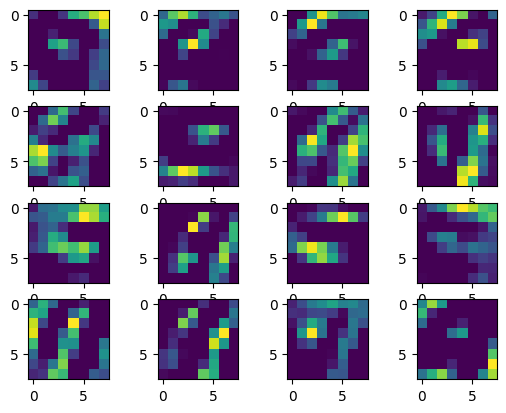

In [86]:
# Create a model that will return these outputs, given the model input
feature_map_model = Model(inputs=model.inputs, outputs=model.layers[2].output)

# Use the model to predict the features
feature_maps = feature_map_model.predict(x_test[12].reshape(1, 28, 28, 1))


# Plot the second feature maps
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
plt.show()


# Conclusion

The CNN LeNet aproach for MNIST classification problem proved to be better than MLP because the number of parameters. Wich implies directly on time to training the model.

LeNet has 44.426 parameters and my MLP approach has 1.024.080.

